In [1]:
pwd

'/Users/inceatakan/Desktop/SPEECH_EMOTION_RECOGNITION'

In [2]:
import os
import pandas as pd
import random
import librosa
import keras
import matplotlib.pyplot as plt
import wave
import numpy as np
from keras.utils import np_utils
import python_speech_features as ps
import os
import glob
from librosa import display

/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [3]:
audio_path2 = "train"

In [4]:
os.path.isdir(audio_path2)

True

In [5]:
pwd

'/Users/inceatakan/Desktop/SPEECH_EMOTION_RECOGNITION'

In [6]:
trainDoc = pd.read_csv("train/train.csv")
data_dir = "train/Train"

Class:  drilling


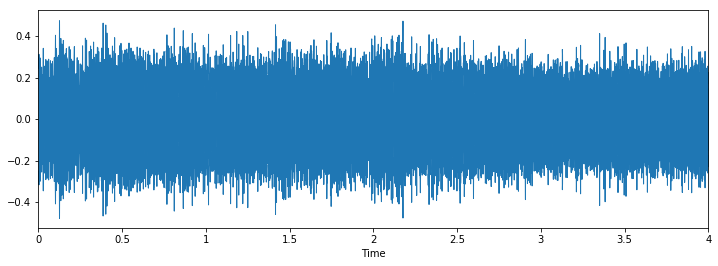

In [7]:
i = random.choice(trainDoc.index)

audio_name = trainDoc.ID[i]
path = os.path.join(data_dir, 'Train', str(audio_name) + '.wav')

print('Class: ', trainDoc.Class[i])
x, sr = librosa.load('train/Train/' + str(trainDoc.ID[i]) + '.wav')

plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr)

In [8]:
trainDoc.Class.value_counts()

jackhammer          668
engine_idling       624
siren               607
children_playing    600
drilling            600
street_music        600
dog_bark            600
air_conditioner     600
car_horn            306
gun_shot            230
Name: Class, dtype: int64

In [9]:
def parser(row):
   # function to load files and extract features
   file_name = os.path.join(os.path.abspath("train"), 'Train', str(row.ID) + '.wav')

   # handle exception to check if there isn't a file which is corrupted
   try:
      # here kaiser_fast is a technique used for faster extraction
       X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
      # we extract mfcc feature from data
       mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
   except Exception as e:
      print("Error encountered while parsing file: ", file_name)
      return None, None
 
   feature = mfccs
   label = row.Class
 
   return [feature, label]

temp = trainDoc.apply(parser, axis=1)
temp.columns = ['feature', 'label']

In [10]:
temp.describe()
#temp.head()

,feature,label
count,5435,5435
unique,5435,10
top,"[-124.83897023141179, 97.90797635351814, -0.47...",jackhammer
freq,1,668


In [11]:
temp.columns

Index(['feature', 'label'], dtype='object')

In [12]:
from sklearn.preprocessing import LabelEncoder

X = np.array(temp.feature.tolist())
y = np.array(temp.label.tolist())

lb = LabelEncoder()

y = np_utils.to_categorical(lb.fit_transform(y))

In [13]:
X = np.expand_dims(X, axis=2)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

#print(X.shape)
#print(y.shape)

In [14]:
X.size

217400

In [15]:
X.shape

(5435, 40, 1)

In [16]:
y.shape

(5435, 10)

In [17]:
import numpy as np
from keras import layers
from keras import callbacks
from keras.layers import Input, Dense, Activation, ZeroPadding1D, BatchNormalization, Flatten, Conv2D, Conv1D
from keras.layers import AveragePooling1D, MaxPooling1D, Dropout, GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from kt_utils import *
from sklearn.model_selection import train_test_split
from keras.models import Sequential

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4348, 40, 1)
(4348, 10)
(1087, 40, 1)
(1087, 10)


In [40]:
# CNN Model 1
np.random.seed(7)

inp =  Input(shape=(40, 1))
conv1 = Conv1D(filters=128, kernel_size=8)(inp)
pool1 = MaxPooling1D(pool_size=2)(conv1)
conv2 = Conv1D(filters=128, kernel_size=8)(pool1)
pool2 = MaxPooling1D(pool_size=2)(conv2)
flat = Flatten()(pool2)
#dense = Dense(1)(flat)
dense = Dense(10, activation='sigmoid')(flat)
model = Model(inp, dense)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

print(model.summary())

model.fit(X_train, y_train, epochs = 200, batch_size = 16)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 40, 1)             0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 33, 128)           1152      
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 16, 128)           0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 9, 128)            131200    
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 4, 128)            0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                5130      
Total para

4348/4348 [==============================] - 2s 482us/step - loss: 0.0198 - acc: 0.9968
Epoch 150/200
4348/4348 [==============================] - 2s 515us/step - loss: 0.0172 - acc: 0.9970
Epoch 151/200
4348/4348 [==============================] - 2s 419us/step - loss: 0.0136 - acc: 0.9979
Epoch 152/200
4348/4348 [==============================] - 2s 450us/step - loss: 0.0232 - acc: 0.9964
Epoch 153/200
4348/4348 [==============================] - 2s 427us/step - loss: 0.0152 - acc: 0.9974
Epoch 154/200
4348/4348 [==============================] - 2s 397us/step - loss: 0.0193 - acc: 0.9972
Epoch 155/200
4348/4348 [==============================] - 2s 414us/step - loss: 0.0288 - acc: 0.9958
Epoch 156/200
4348/4348 [==============================] - 2s 425us/step - loss: 0.0350 - acc: 0.9958
Epoch 157/200
4348/4348 [==============================] - 3s 594us/step - loss: 0.0195 - acc: 0.9968
Epoch 158/200
4348/4348 [==============================] - 2s 401us/step - loss: 0.0223 - acc: 0

In [41]:
### CNN Model 1 on Test Data

preds = model.evaluate(x = X_test, y = y_test)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1087/1087 [==============================] - 0s 455us/step

Loss = 0.3836100569205648
Test Accuracy = 0.9704691931646464
